<a href="https://colab.research.google.com/github/shaik-hafija/chatbot/blob/master/image_searcg(%20using%20clip%20model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sentence_transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.5 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=21518af1232739e18a9addac247feb780c32e7b698cf957246618889e0fe269a
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [2]:
data_path = "/content/drive/MyDrive/Images"

In [3]:
import os
os.listdir(data_path)

['3759492488_592cd78ed1.jpg',
 '377872672_d499aae449.jpg',
 '375392855_54d46ed5c8.jpg',
 '380515798_c2abbf46b0.jpg',
 '380590140_25b9889772.jpg',
 '381052465_722e00807b.jpg',
 '381976882_0063d16d88.jpg',
 '380041023_0dfd712ef1.jpg',
 '382701159_f98c1988cd.jpg',
 '384465370_9918873f9a.jpg',
 '386160015_d4b31df68e.jpg',
 '382090166_be2c2c63e1.jpg',
 '386656845_4e77c3e3da.jpg',
 '381514859_b40418d9c3.jpg',
 '384465575_31294122c0.jpg',
 '386655611_1329495f97.jpg',
 '381239475_044cbffa2b.jpg',
 '381275595_b429fd1639.jpg',
 '387078972_514a38dc33.jpg',
 '384577800_fc325af410.jpg',
 '380527679_574749123d.jpg',
 '383223174_7165a54c30.jpg',
 '382151094_c7376cf22b.jpg',
 '380537190_11d6c0a412.jpg',
 '385835044_4aa11f6990.jpg',
 '386470686_1ae9242878.jpg',
 '385186343_464f5fc186.jpg',
 '393284934_d38e1cd6fe.jpg',
 '391579205_c8373b5411.jpg',
 '390992102_67fa31b22f.jpg',
 '393958545_48c17c66d1.jpg',
 '392976422_c8d0514bc3.jpg',
 '387830531_e89c192b92.jpg',
 '387974450_bcd205daac.jpg',
 '389643437_9

In [4]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import glob
import torch
import pickle
import zipfile
from IPython.display import display
from IPython.display import Image as IPImage
import os
from tqdm.autonotebook import tqdm

# Here we load the multilingual CLIP model. Note, this model can only encode text.
# If you need embeddings for images, you must load the 'clip-ViT-B-32' model
model = SentenceTransformer('clip-ViT-B-32-multilingual-v1')

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.57M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.63k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/539M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/371 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_images(images, query, n_row=2, n_col=2):
    _, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
    axs = axs.flatten()
    for img, ax in zip(images, axs):
        ax.set_title(query)
        ax.imshow(img)
    plt.show()





In [7]:

# Lets compute the image embeddings.

#For embedding images, we need the non-multilingual CLIP model
import os
img_model = SentenceTransformer('clip-ViT-B-32')
data_path = "/content/drive/MyDrive/Images"
img_names = [os.path.join(data_path, filename) for filename in os.listdir(data_path) if filename.endswith(".jpg")]

print("Data Path:", data_path)
print("Images:", len(img_names))
print("Images:", len(img_names))
img_emb = img_model.encode([Image.open(filepath) for filepath in img_names], batch_size=128, convert_to_tensor=True, show_progress_bar=True)


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

Data Path: /content/drive/MyDrive/Images
Images: 8159
Images: 8159


Batches:   0%|          | 0/64 [00:00<?, ?it/s]

In [8]:
img_emb.shape, type(img_emb)

(torch.Size([8159, 512]), torch.Tensor)

In [9]:
# Next, we define a search function.
def search(query, k=4):
    # First, we encode the query (which can either be an image or a text string)
    query_emb = model.encode([query], convert_to_tensor=True, show_progress_bar=False)

    # Then, we use the util.semantic_search function, which computes the cosine-similarity
    # between the query embedding and all image embeddings.
    # It then returns the top_k highest ranked images, which we output
    hits = util.semantic_search(query_emb, img_emb, top_k=k)[0]

    matched_images = []
    for hit in hits:
        matched_images.append(Image.open(img_names[hit['corpus_id']]))

    plot_images(matched_images, query)
    #print(matched_images)

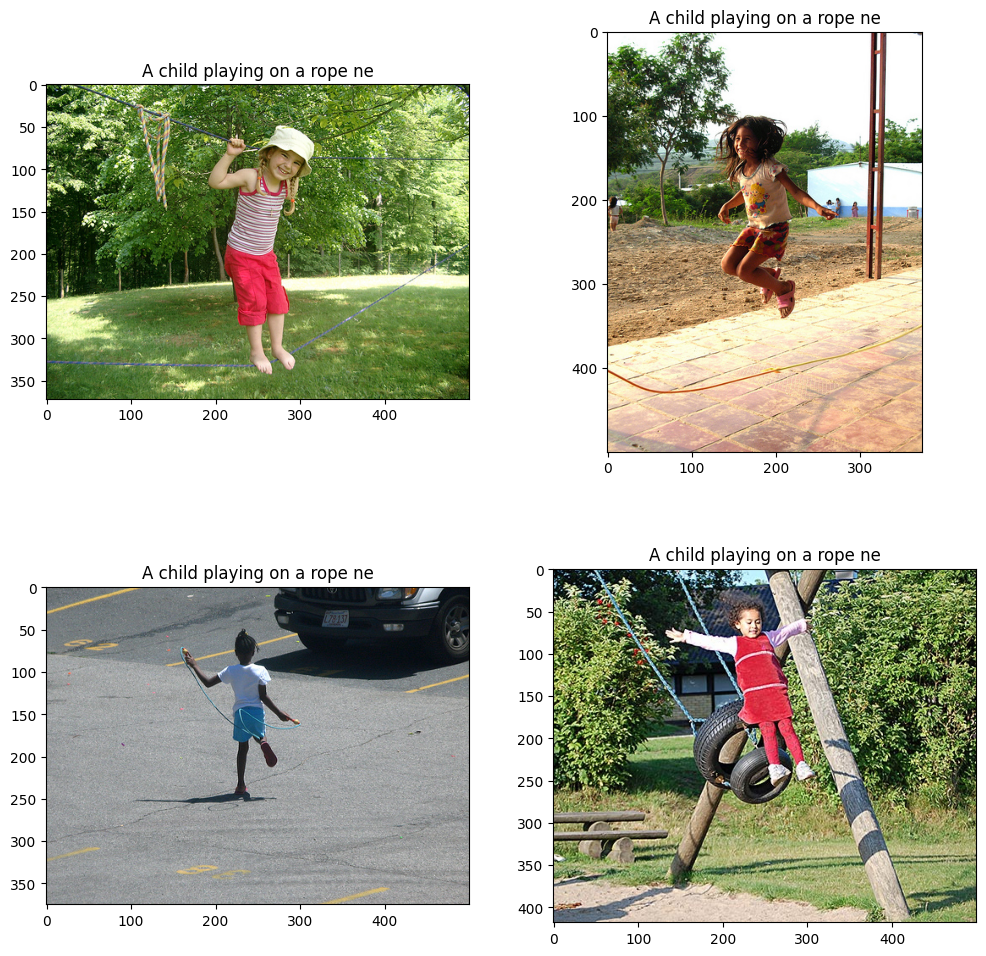

In [27]:
search('A child playing on a rope ne')